In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

## Read input

In [2]:
# read info about all bins
all_hq = pd.read_excel('../!DATA_EstMB_MAGdb/HQcl_all_bins_all_info.xlsx')
all_lq = pd.read_excel('../!DATA_EstMB_MAGdb/LQcl_all_bins_all_info.xlsx')
# read info about representative bins
rep_hq = pd.read_excel('../!DATA_EstMB_MAGdb/HQcl_representative_MAGs_all_info.xlsx')
rep_lq = pd.read_excel('../!DATA_EstMB_MAGdb/LQcl_representative_MAGs_all_info.xlsx')
# read info about all bins together
all_mag = pd.read_excel('../2023_FINAL_build/results/together_HQLQcl_all_MAGs_all_info.xlsx')
rep_mag = pd.read_excel('../2023_FINAL_build/results/together_HQLQcl_representative_MAGs_all_info.xlsx')

# combine all_lq and all_hq
all_bins = pd.concat([all_lq, all_hq])

## Target species stats

In [13]:
trg = 'Odoribacter splanchnicus'
trg1 = 'Odoribacter'
#trg = 'Phocaeicola vulgatus'
#trg1 = 'Phocaeicola'

trg_all = all_bins[all_bins['sp']== trg]
trg_rep = rep_mag[rep_mag['sp']== trg]

trg_gn = all_bins[all_bins['genus']== trg1]
trg_gn_rep = rep_mag[rep_mag['genus']== trg1]


In [15]:
trg_all['cluster'].unique()

array(['LQ-522_1', 'HQ-591_1'], dtype=object)

In [16]:
# presence/absence of taxa in all bins
print('Species bins number:', len(trg_all))
# number of clusters
print('HQcl bins belongs to:', len(trg_rep['cluster'].unique()), 'cluster')

Species bins number: 1364
HQcl bins belongs to: 1 cluster


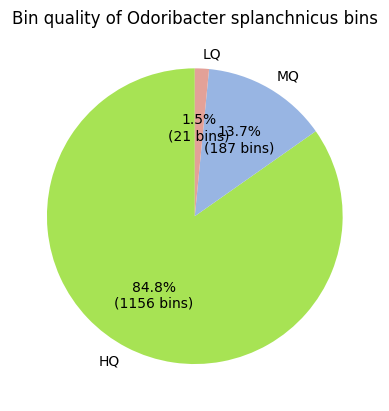

In [17]:
# count bin_qual values
vcount = trg_all['bin_qual'].value_counts()
# convert to dataframe
vcount = pd.DataFrame(vcount)
# add color column based on dictionary
vcount['color'] = vcount.index.map({'HQ': '#a7e354', 'MQ': '#98b5e3', 'LQ': '#e3a198'})

# Custom autopct function to display count values
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} bins)".format(pct, absolute)

# Plot the first pie chart
# Check if DataFrame is empty
if vcount.empty:
    plt.scatter(1, 1, color='red', marker='o')
    # Remove the plot border
    plt.spines['top'].set_visible(False)
    plt.spines['right'].set_visible(False)
    plt.spines['bottom'].set_visible(False)
    plt.spines['left'].set_visible(False)
    # Remove the ticks
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
    plt.text(1, 1, 'no bins')
    plt.set_title('HQ&LQ clustering together')
else:
    plt.pie(vcount['bin_qual'], labels=vcount.index, autopct=lambda pct: func(pct, vcount['bin_qual']), colors=vcount['color'], startangle=90)
    
    plt.title('Bin quality of '+str(trg)+' bins')

plt.savefig('results/Bin_qual_'+str(trg)+'.png', dpi=300, bbox_inches='tight')


In [18]:
# all db taxa
fig = px.sunburst(
    trg_gn,
    path=['genus', 'sp'],
    values='bin_number_in_cluster',
    title="Bacteroides, \n GTDB, release214",
    color='sp',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("results/taxa_"+str(trg1)+".html")

In [19]:
trg_gn2 = trg_gn[['genus', 'sp', 'bin_number_in_cluster']].drop_duplicates()

In [20]:
len(trg_gn['sp'].value_counts())

7

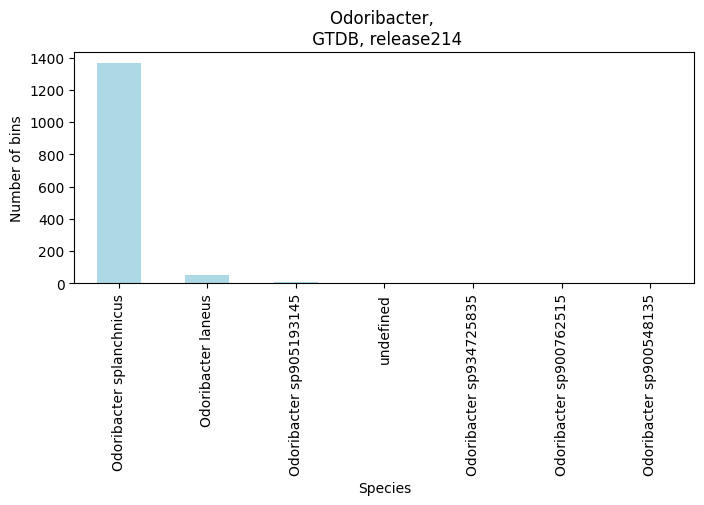

In [22]:
# set index

trg_gn['sp'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(8,3), color='lightblue')
plt.title(str(trg1)+', \n GTDB, release214')
plt.ylabel('Number of bins')
plt.xlabel('Species')
plt.savefig('results/taxa_'+str(trg1)+'_bar.png', dpi=300, bbox_inches='tight')

In [24]:
len(trg_gn_rep['bin_number_in_cluster'].sort_values(ascending=False))

6

In [23]:
trg_gn_rep['bin_number_in_cluster'].sort_values(ascending=False)

0       1332
305       48
842        7
1430       2
1432       2
2042       1
Name: bin_number_in_cluster, dtype: int64

### Genome size

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning:

48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning:

59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



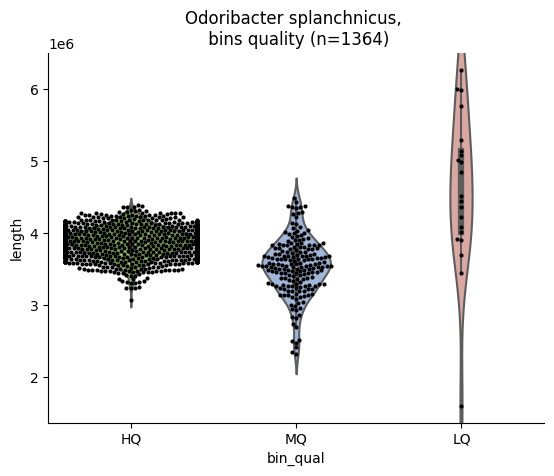

In [25]:
sns.violinplot(y='length', x='bin_qual', data=trg_all, order=[ "HQ", "MQ", "LQ"], palette=['#a7e354', '#98b5e3', '#e3a198'])
plt.title(str(trg)+", \n bins quality (n="+str(len(trg_all))+")")
sns.despine()
sns.swarmplot(y='length', x='bin_qual', data=trg_all, order=[ "HQ", "MQ", "LQ"], color='black', size=3)
#plt.hlines(y=4629452, xmin=-0.5, xmax=2.5, color='red', linestyle='--')

plt.savefig('results/Genome_length'+str(trg)+'.jpg', dpi=150)